In [1]:
import pennylane as qml
import numpy as np

/var/folders/yj/hd9lb5wn7ms2gf09wbjpmf_40000gn/T/ipykernel_23090/2829588670.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[[0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


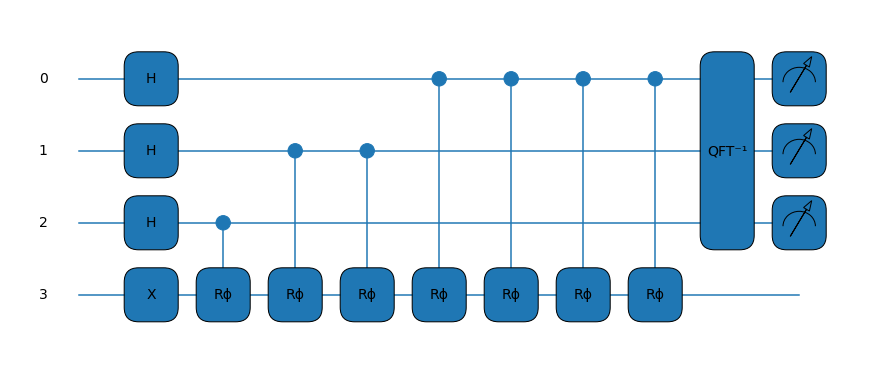

In [2]:
# QPE - An Application of QFT^-1 (Using 4 Qubits)
# Let U = T-Gate, and the prepared eigenstate to be 1. 
dev = qml.device('default.qubit', wires = 4, shots = 10)

@qml.qnode(dev)
def circuit():
    qml.PauliX(wires = 3)
    
    for qubit in range(3):
        qml.Hadamard(wires = qubit)     
    
    repetitions = 1
    
    for x in range(2, -1, -1):
        for i in range(repetitions):  
            qml.ControlledPhaseShift(np.pi / 4, wires = [x, 3])
        repetitions *= 2

    qml.adjoint(qml.QFT)(wires = [0, 1, 2])
    return qml.sample(wires = [0, 1, 2])

fig, ax = qml.draw_mpl(circuit)()
fig.show()
print(circuit())
    

    
        